In [1]:
import os
os.chdir("C:\\Users\\Venki\\Desktop\\data science\\All data")

In [3]:
!pip install mlxtend

In [5]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# BOOK

In [6]:
books=pd.read_csv('books.csv')

In [7]:
books.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [9]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [10]:
books['ChildBks'].value_counts()

0    1154
1     846
Name: ChildBks, dtype: int64

# Apriori algorithm

# Checking the association rules for minimum support of 0.1

In [11]:
frequent_itemsets = apriori(books, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [12]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules
rules.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
29,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
76,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
81,(GeogBks),"(ArtBks, ChildBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
85,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
...,...,...,...,...,...,...,...,...,...
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
12,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105
13,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069


In [13]:
rules.sort_values('lift')[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
13,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678
12,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
5,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
21,(CookBks),(DoItYBks),0.4310,0.2820,0.1875,0.435035,1.542677,0.065958,1.270875
20,(DoItYBks),(CookBks),0.2820,0.4310,0.1875,0.664894,1.542677,0.065958,1.697968
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000


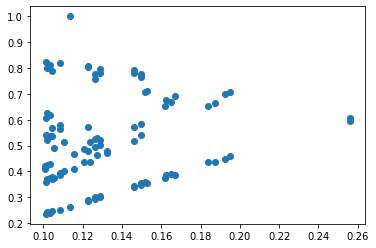

In [15]:
plt.scatter(rules['support'], rules['confidence'])
plt.show()

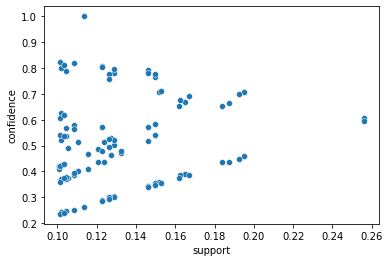

In [17]:
sns.scatterplot('support', 'confidence', data=rules,)
plt.show()

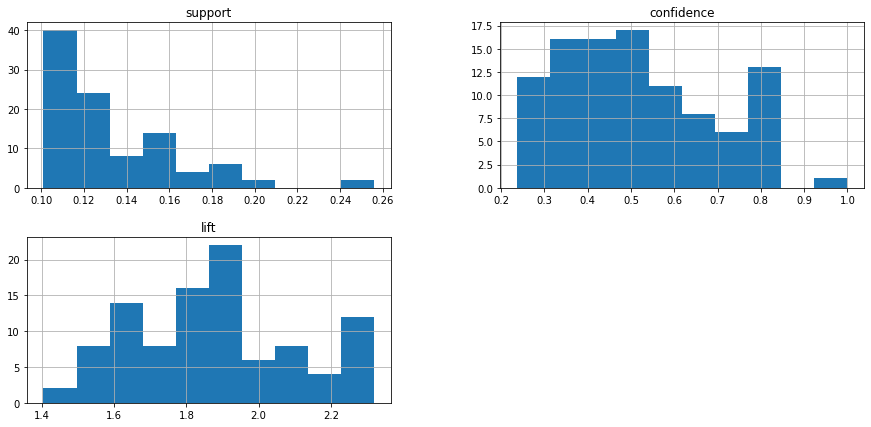

In [18]:
rules[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

In [19]:
rules.sort_values(by='lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
29,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
76,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
81,(GeogBks),"(ArtBks, ChildBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
85,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
...,...,...,...,...,...,...,...,...,...
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
12,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105
13,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069


# Checking the association rules for minimum support of 0.25


In [20]:
frequent_itemsets1 = apriori(books, min_support=0.25, use_colnames=True)
frequent_itemsets1

,support,itemsets
0,0.423,(ChildBks)
1,0.431,(CookBks)
2,0.282,(DoItYBks)
3,0.276,(GeogBks)
4,0.256,"(ChildBks, CookBks)"


In [21]:
rules1 = association_rules(frequent_itemsets1, metric="lift", min_threshold=1.0)
rules1
rules1.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240
1,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069


In [22]:
rules1.sort_values('lift')[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240
1,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069


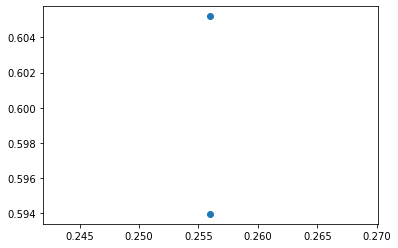

In [23]:
plt.scatter(rules1['support'], rules1['confidence'])
plt.show()

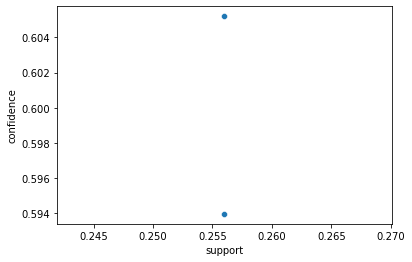

In [24]:
sns.scatterplot('support', 'confidence', data=rules1,)
plt.show()

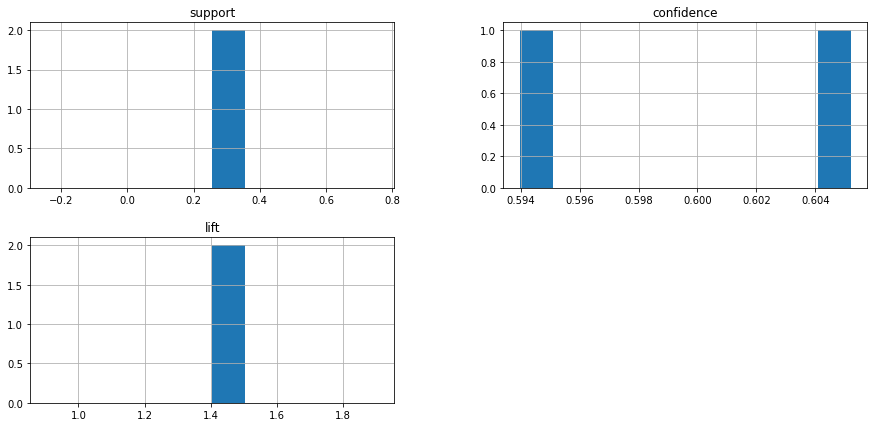

In [25]:
rules1[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

In [26]:
rules1.sort_values(by='lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240
1,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069


# Checking the association rules for minimum support of 0.15

In [27]:
frequent_itemsets3 = apriori(books, min_support=0.15, use_colnames=True)
frequent_itemsets3

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1650,"(YouthBks, ChildBks)"
8,0.2560,"(ChildBks, CookBks)"
9,0.1840,"(DoItYBks, ChildBks)"


In [28]:
rules3 = association_rules(frequent_itemsets3, metric="lift", min_threshold=1.0)
rules3
rules3.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
10,(ChildBks),(GeogBks),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211
11,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
7,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818
6,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
17,(CookBks),(RefBks),0.4310,0.2145,0.1525,0.353828,1.649549,0.060050,1.215621
16,(RefBks),(CookBks),0.2145,0.4310,0.1525,0.710956,1.649549,0.060050,1.968556
20,(GeogBks),(CookBks),0.2760,0.4310,0.1925,0.697464,1.618245,0.073544,1.880766
21,(CookBks),(GeogBks),0.4310,0.2760,0.1925,0.446636,1.618245,0.073544,1.308361
18,(ArtBks),(CookBks),0.2410,0.4310,0.1670,0.692946,1.607763,0.063129,1.853095
19,(CookBks),(ArtBks),0.4310,0.2410,0.1670,0.387471,1.607763,0.063129,1.239125


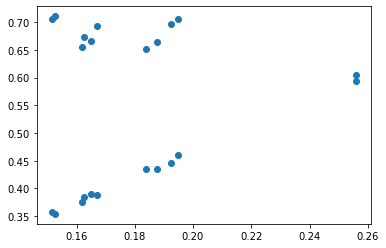

In [29]:
plt.scatter(rules3['support'], rules3['confidence'])
plt.show()

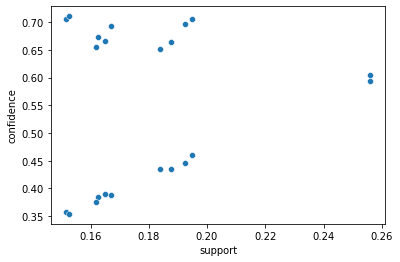

In [30]:
sns.scatterplot('support', 'confidence', data=rules3,)
plt.show()

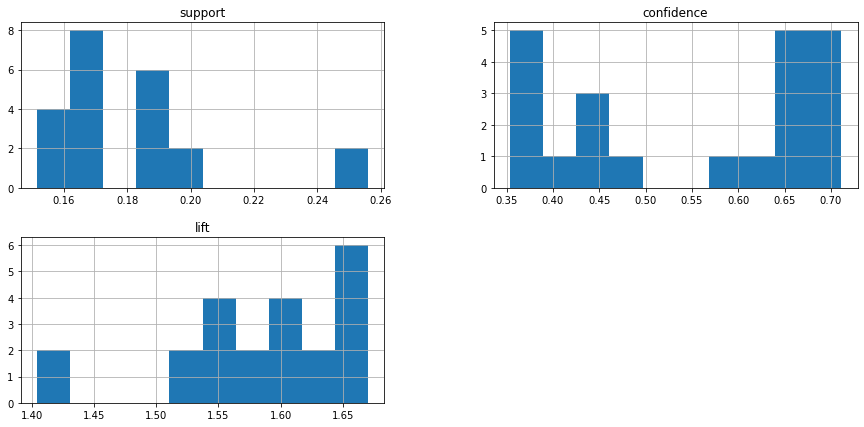

In [31]:
rules3[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

In [32]:
rules3.sort_values(by='lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
10,(ChildBks),(GeogBks),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211
11,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
7,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818
6,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
17,(CookBks),(RefBks),0.4310,0.2145,0.1525,0.353828,1.649549,0.060050,1.215621
16,(RefBks),(CookBks),0.2145,0.4310,0.1525,0.710956,1.649549,0.060050,1.968556
20,(GeogBks),(CookBks),0.2760,0.4310,0.1925,0.697464,1.618245,0.073544,1.880766
21,(CookBks),(GeogBks),0.4310,0.2760,0.1925,0.446636,1.618245,0.073544,1.308361
18,(ArtBks),(CookBks),0.2410,0.4310,0.1670,0.692946,1.607763,0.063129,1.853095
19,(CookBks),(ArtBks),0.4310,0.2410,0.1670,0.387471,1.607763,0.063129,1.239125


# My Movies

In [33]:
movies=pd.read_csv('my_movies.csv')

In [34]:
movies.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [35]:
movies_df=movies.drop(['V1','V2','V3','V4','V5'],axis=1)
movies_df

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [36]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Sixth Sense    10 non-null     int64
 1   Gladiator      10 non-null     int64
 2   LOTR1          10 non-null     int64
 3   Harry Potter1  10 non-null     int64
 4   Patriot        10 non-null     int64
 5   LOTR2          10 non-null     int64
 6   Harry Potter2  10 non-null     int64
 7   LOTR           10 non-null     int64
 8   Braveheart     10 non-null     int64
 9   Green Mile     10 non-null     int64
dtypes: int64(10)
memory usage: 928.0 bytes


In [37]:
movies_df['Sixth Sense'].value_counts()

1    6
0    4
Name: Sixth Sense, dtype: int64

# Apriori algorithm

In [38]:
frequent_itemsets = apriori(movies_df, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [39]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules
rules.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
132,"(Gladiator, Green Mile)","(LOTR, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
188,"(Green Mile, Harry Potter1)","(LOTR2, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
127,"(Gladiator, Sixth Sense, Green Mile)",(LOTR),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
129,"(LOTR, Sixth Sense)","(Gladiator, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
203,"(Green Mile, LOTR1)","(LOTR2, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
...,...,...,...,...,...,...,...,...,...
37,(Sixth Sense),"(Patriot, Gladiator)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
44,"(Gladiator, Sixth Sense)",(Green Mile),0.5,0.2,0.1,0.200000,1.000000,0.00,1.0


In [40]:
rules.sort_values('lift')[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
44,"(Gladiator, Sixth Sense)",(Green Mile),0.5,0.2,0.1,0.200000,1.000000,0.00,1.00
47,(Green Mile),"(Gladiator, Sixth Sense)",0.2,0.5,0.1,0.500000,1.000000,0.00,1.00
37,(Sixth Sense),"(Patriot, Gladiator)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
32,"(Patriot, Gladiator)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
34,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.00
35,(Patriot),"(Gladiator, Sixth Sense)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.50


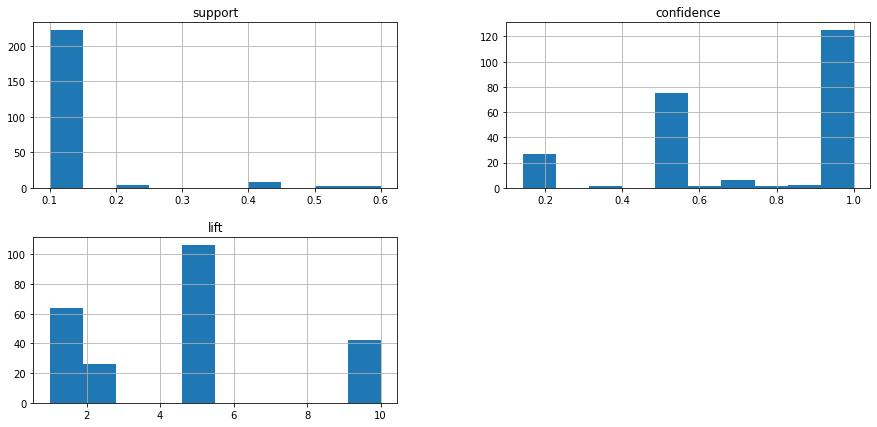

In [41]:
rules[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

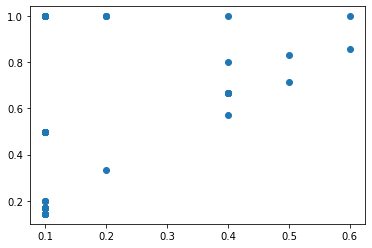

In [42]:
plt.scatter(rules['support'], rules['confidence'])
plt.show()

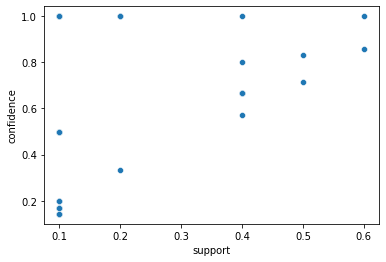

In [43]:
sns.scatterplot('support', 'confidence', data=rules,)
plt.show()

In [44]:
rules.sort_values(by='lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
132,"(Gladiator, Green Mile)","(LOTR, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
188,"(Green Mile, Harry Potter1)","(LOTR2, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
127,"(Gladiator, Sixth Sense, Green Mile)",(LOTR),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
129,"(LOTR, Sixth Sense)","(Gladiator, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
203,"(Green Mile, LOTR1)","(LOTR2, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
...,...,...,...,...,...,...,...,...,...
37,(Sixth Sense),"(Patriot, Gladiator)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
44,"(Gladiator, Sixth Sense)",(Green Mile),0.5,0.2,0.1,0.200000,1.000000,0.00,1.0


# Checking the association rules for minimum support of 0.13

In [45]:
frequent_itemsets1 = apriori(movies_df, min_support=0.25, use_colnames=True)
frequent_itemsets1

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.5,"(Gladiator, Sixth Sense)"
4,0.4,"(Patriot, Sixth Sense)"
5,0.6,"(Patriot, Gladiator)"
6,0.4,"(Patriot, Gladiator, Sixth Sense)"


In [46]:
rules1 = association_rules(frequent_itemsets1, metric="lift", min_threshold=1.0)
rules1
rules1.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
4,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
7,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
10,(Gladiator),"(Patriot, Sixth Sense)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
8,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
9,(Patriot),"(Gladiator, Sixth Sense)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


In [47]:
rules1.sort_values('lift')[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
6,"(Patriot, Gladiator)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
11,(Sixth Sense),"(Patriot, Gladiator)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
8,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
9,(Patriot),"(Gladiator, Sixth Sense)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5
4,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
7,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf


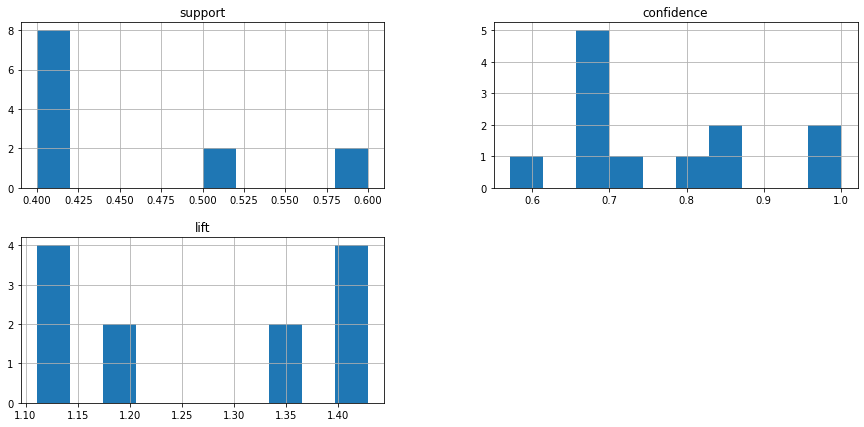

In [48]:
rules1[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

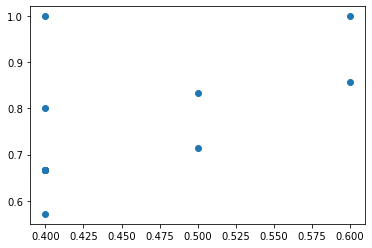

In [49]:
plt.scatter(rules1['support'], rules1['confidence'])
plt.show()

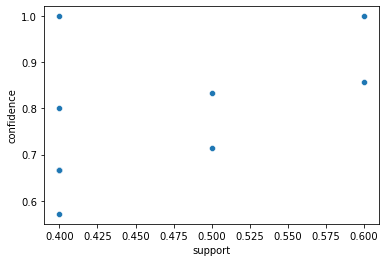

In [50]:
sns.scatterplot('support', 'confidence', data=rules1,)
plt.show()

In [51]:
rules1.sort_values(by='lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
4,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
7,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
10,(Gladiator),"(Patriot, Sixth Sense)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
8,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
9,(Patriot),"(Gladiator, Sixth Sense)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


# Checking the association rules for minimum support of 0.5

In [52]:
frequent_itemsets2 = apriori(movies_df, min_support=0.5, use_colnames=True)
frequent_itemsets2

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.5,"(Gladiator, Sixth Sense)"
4,0.6,"(Patriot, Gladiator)"


In [53]:
rules2 = association_rules(frequent_itemsets2, metric="lift", min_threshold=1.0)
rules2
rules2.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4


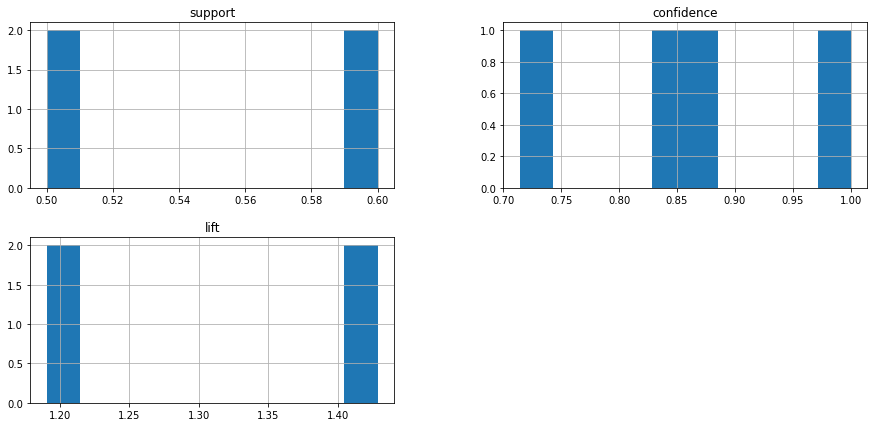

In [54]:
rules2[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

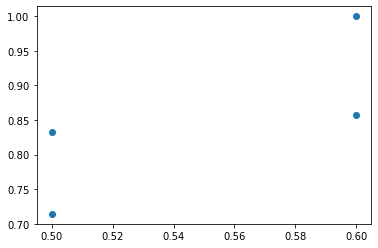

In [55]:
plt.scatter(rules2['support'], rules2['confidence'])
plt.show()

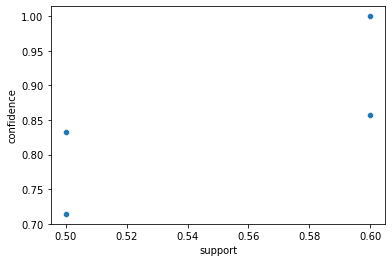

In [56]:
sns.scatterplot('support', 'confidence', data=rules2,)
plt.show()

In [57]:
rules2.sort_values(by='lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
